In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
df_iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_iris.drop('Id',axis=1).groupby('Species').describe(percentiles=[]).transpose()

Species              Iris-setosa  Iris-versicolor  Iris-virginica
SepalLengthCm count    50.000000        50.000000       50.000000
              mean      5.006000         5.936000        6.588000
              std       0.352490         0.516171        0.635880
              min       4.300000         4.900000        4.900000
              50%       5.000000         5.900000        6.500000
              max       5.800000         7.000000        7.900000
SepalWidthCm  count    50.000000        50.000000       50.000000
              mean      3.418000         2.770000        2.974000
              std       0.381024         0.313798        0.322497
              min       2.300000         2.000000        2.200000
              50%       3.400000         2.800000        3.000000
              max       4.400000         3.400000        3.800000
PetalLengthCm count    50.000000        50.000000       50.000000
              mean      1.464000         4.260000        5.552000
              std       0.173511         0.469911        0.551895
              min       1.000000         3.000000        4.500000
              50%       1.500000         4.350000        5.550000
              max       1.900000         5.100000        6.900000
PetalWidthCm  count    50.000000        50.000000       50.000000
              mean      0.244000         1.326000        2.026000
              std       0.107210         0.197753        0.274650
              min       0.100000         1.000000        1.400000
              50%       0.200000         1.300000        2.000000
              max       0.600000         1.800000        2.500000

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

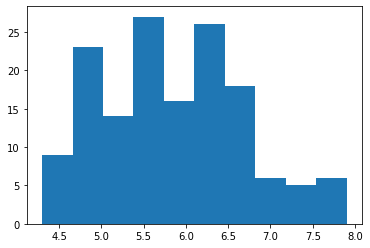

In [6]:
plt.hist(df_iris["SepalLengthCm"])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

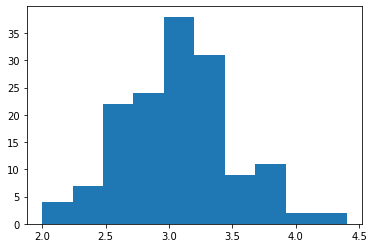

In [7]:

plt.hist(df_iris["SepalWidthCm"])

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

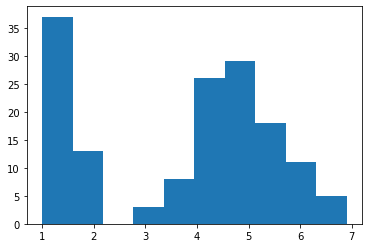

In [8]:

plt.hist(df_iris["PetalLengthCm"])

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

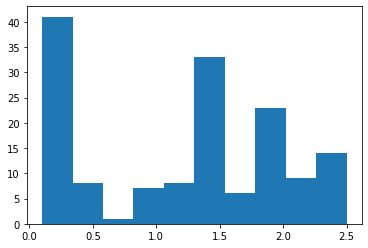

In [9]:

plt.hist(df_iris["PetalWidthCm"])

In [10]:
df_iris["Species"] = df_iris["Species"].factorize()[0]
df_spec = df_iris["Species"]
df_iris = df_iris.drop(["Id","Species"],axis=1)

In [11]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Dataset(Dataset):
    def __init__(self,X,y) :
        self.X = torch.Tensor(X.to_numpy());
        self.y = torch.Tensor(y.to_numpy()).reshape(-1,1);
    
    def __len__(self) :
        return len(self.X)
    
    def __getitem__(self, idx) :
        x = torch.FloatTensor(self.X[idx])
        y = torch.FloatTensor(self.y[idx])
        return x,y;


In [12]:
df_iris_train_X = pd.concat([df_iris[:30],df_iris[50:80],df_iris[100:130]])
df_iris_train_y = pd.concat([df_spec[:30],df_spec[50:80],df_spec[100:130]])
df_iris_val_X = pd.concat([df_iris[31:49],df_iris[81:99],df_iris[131:149]])
df_iris_val_y = pd.concat([df_spec[31:49],df_spec[81:99],df_spec[131:149]])

In [13]:
train_dataset = Dataset(df_iris_train_X, df_iris_train_y)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = Dataset(df_iris_val_X, df_iris_val_y)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=True)

In [14]:
from torch import nn

class ThreeLayerNet(nn.Module) :
    def __init__(self) :
        super(ThreeLayerNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,1)
        )
        
    def forward(self,x) :
        x = self.flatten(x)
        y = self.linear_relu_stack(x)
        #print(np.shape(x),np.shape(y))
        return y;
    
model = ThreeLayerNet()
print(model)

ThreeLayerNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [15]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [16]:
def train(dataloader, model, loss_fn, optimizer) :
    size = len(dataloader.dataset)
    for batch, (X,y), in enumerate(dataloader):
        pred = model.forward(X)
        loss = loss_fn(pred, y)
        train_loss_log.append(loss.item());
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(batch%30==0) :
            loss,current = loss.item(), batch* len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [17]:
def test(dataloader, model, loss_fn) :
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader :
            pred = model.forward(X)
            if(pred <= 0.5) :
                ans = 0;
            elif(pred <= 1.5) :
                ans = 1;
            else :
                ans = 2;
            
            val_loss = loss_fn(pred,y).item()
            correct += (ans==y).type(torch.float).sum().item()
    val_loss /= num_batches
    correct /= size;
    print(f"val Error : \n Accuracy: { (100*correct) : >0.1f}% Avg loss : {val_loss :>8f}\n")

In [18]:
epochs =20
train_loss_log  =[]

for t in range(epochs) :
    print(f"Epoch {t+1}\n------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
    
print("Done!")


Epoch 1
------------------
loss: 0.175789 [    0/   90]
loss: 0.190656 [   30/   90]
loss: 0.550461 [   60/   90]
val Error : 
 Accuracy: 64.8% Avg loss : 0.006982

Epoch 2
------------------
loss: 0.262471 [    0/   90]
loss: 0.163295 [   30/   90]
loss: 0.159068 [   60/   90]
val Error : 
 Accuracy: 88.9% Avg loss : 0.000432

Epoch 3
------------------
loss: 0.020345 [    0/   90]
loss: 0.185248 [   30/   90]
loss: 0.126144 [   60/   90]
val Error : 
 Accuracy: 92.6% Avg loss : 0.000047

Epoch 4
------------------
loss: 0.020584 [    0/   90]
loss: 0.123505 [   30/   90]
loss: 0.028263 [   60/   90]
val Error : 
 Accuracy: 96.3% Avg loss : 0.001575

Epoch 5
------------------
loss: 0.093737 [    0/   90]
loss: 0.008745 [   30/   90]
loss: 0.049555 [   60/   90]
val Error : 
 Accuracy: 94.4% Avg loss : 0.004586

Epoch 6
------------------
loss: 0.242624 [    0/   90]
loss: 0.092171 [   30/   90]
loss: 0.012620 [   60/   90]
val Error : 
 Accuracy: 98.1% Avg loss : 0.000222

Epoch 7
--

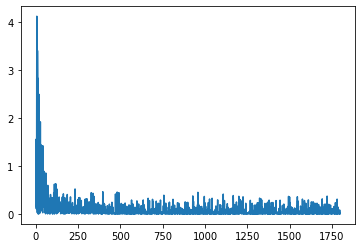

In [19]:
np.shape(train_loss_log)
plt.plot(train_loss_log)
plt.show()